#**Response to Marketing Campaign**

##**Assignment**

You are working as a Data Scientist. A task has been commissioned by an insurance company to develop a tool to optimize their marketing efforts. They have given us a data set as a result of an email marketing campaign. The data set includes customer information, described below, as a well as whether the customer responded to the marketing campaign or not.

Design a model that will be able to predict whether a customer will respond to the marketing campaign based on his/her information. In other words, predict the responded target variable described above based on all the input variables provided.

**Briefly answer the following questions:**

1. Describe your model and why did you choose this model over other types of models?
2. Describe any other models you have tried and why do you think this model preforms better?
3. How did you handle missing data?
4. How did you handle categorical (string) data?
5. How did you handle unbalanced data?
6. How did you test your model?

Data Description
Files:

marketing_training.csv - contains the training set that you will use to build the model. The target variable is responded.
marketing_test.csv – contains testing data where the input variables are provided but not the responded target column.

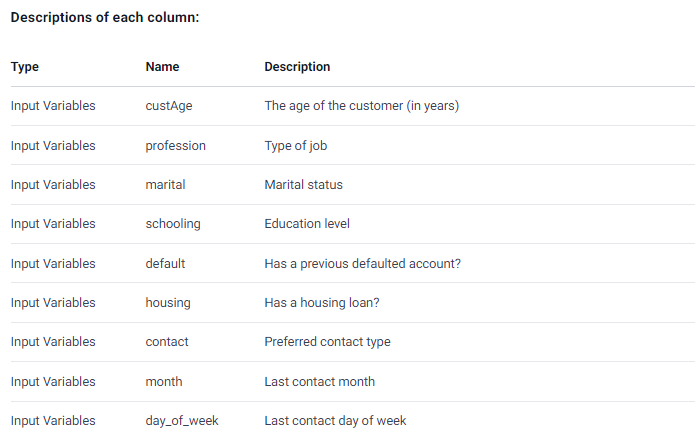
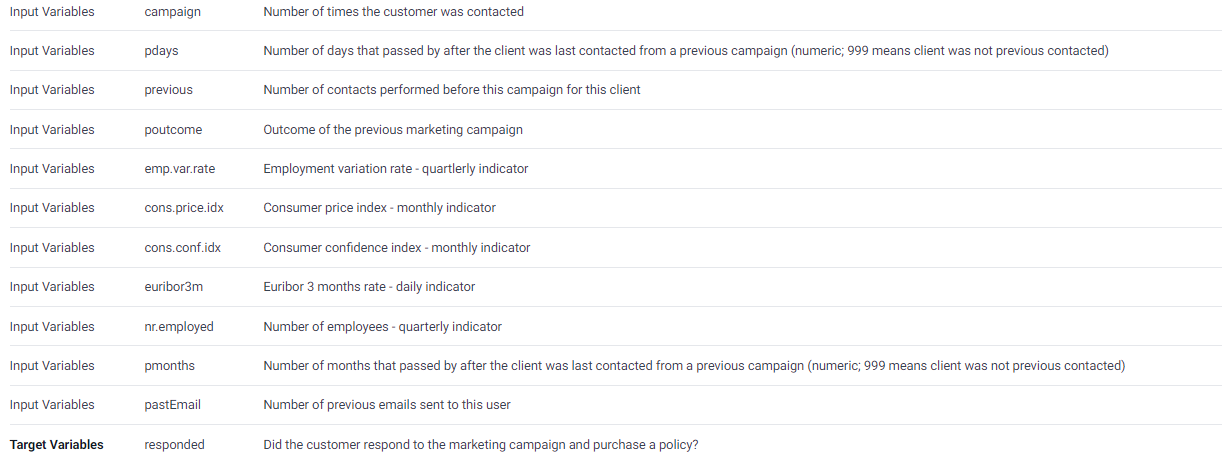

###**Practicalities**

**Provide the following:**

- The source code you used to build the model and make predictions. (You are free to use any language and any open-source package/library)
- A .csv file containing the predictions of the test data. You can add the target column (responded) to the test data or simply provide it alone with the id column.


#### To download the dataset <a href="https://drive.google.com/drive/folders/1WNZVfcDqD1LJakOuKF0STWwALjRxwjlw?usp=sharing"> Click here </a>

In [2]:
import pandas as pd

train_data = pd.read_csv('marketing_training.csv')
test_data = pd.read_csv('marketing_test.csv')

print("Training Data Info:")
print(train_data.info())

print("\nTraining Data Head:")
print(train_data.head())

print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())

print("\nTesting Data Info:")
print(test_data.info())

print("\nTesting Data Head:")
print(test_data.head())

print("\nTarget Variable Distribution:")
print(train_data['responded'].value_counts(normalize=True))

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7414 non-null   object 
 2   marital         7414 non-null   object 
 3   schooling       5259 non-null   object 
 4   default         7414 non-null   object 
 5   housing         7414 non-null   object 
 6   loan            7414 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m    

In [3]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Step 1: Load the datasets
train_data = pd.read_csv('marketing_training.csv')
test_data = pd.read_csv('marketing_test.csv')

# Step 2: Separate features and target variable
X = train_data.drop(columns=['responded'])  # Only drop the 'responded' column
y = train_data['responded']

# Step 3: Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Step 4: Define imputers
numerical_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Step 5: Define One-Hot Encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Step 6: Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', numerical_imputer)]), numerical_features),
        ('cat', Pipeline(steps=[
            ('imputer', categorical_imputer),
            ('onehot', encoder)]), categorical_features)
    ])

# Step 7: Apply preprocessing pipeline to the data
X_processed = preprocessor.fit_transform(X)

# Step 8: Display the shape of the processed data
print(f"Shape of the processed training data: {X_processed.shape}")

# Step 9: Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, stratify=y, random_state=42)

# Step 10: Check the shape of the split data
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")


Shape of the processed training data: (7414, 64)
Training set shape: (5931, 64)
Validation set shape: (1483, 64)


In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Display the class distribution after SMOTE
print("Class distribution after SMOTE:", y_train_balanced.value_counts())

# Step 2: Train a Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Step 3: Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Step 4: Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))
print("\nROC AUC Score:", roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]))


Class distribution after SMOTE: responded
no     5259
yes    5259
Name: count, dtype: int64
Confusion Matrix:
 [[1266   49]
 [ 109   59]]

Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.96      0.94      1315
         yes       0.55      0.35      0.43       168

    accuracy                           0.89      1483
   macro avg       0.73      0.66      0.68      1483
weighted avg       0.88      0.89      0.88      1483


ROC AUC Score: 0.8037638059025891


In [5]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
}

# Initialize the GridSearchCV with GradientBoostingClassifier
grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearch to the balanced training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Output the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC AUC score: ", grid_search.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best ROC AUC score:  0.9756468370798647


In [6]:
# Retrain the model with the best parameters from GridSearchCV
best_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=1.0,
    random_state=42
)

# Fit the best model on the balanced training set
best_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the validation set
y_val_pred_best = best_model.predict(X_val)

# Evaluate the retrained model on the validation set
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred_best))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred_best))
print("\nROC AUC Score:", roc_auc_score(y_val, best_model.predict_proba(X_val)[:, 1]))


Confusion Matrix:
 [[1264   51]
 [ 108   60]]

Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.96      0.94      1315
         yes       0.54      0.36      0.43       168

    accuracy                           0.89      1483
   macro avg       0.73      0.66      0.69      1483
weighted avg       0.88      0.89      0.88      1483


ROC AUC Score: 0.7944685859134527


In [8]:
X_test = test_data.drop(columns=['Unnamed: 0'])  # Drop unnecessary columns
X_test_processed = preprocessor.transform(X_test)

test_predictions = best_model.predict(X_test_processed)

submission_df = pd.DataFrame({
    'id': test_data['Unnamed: 0'], 
    'responded': test_predictions
})

submission_df.to_csv('submission_predictions.csv', index=False)

print("Submission file created: 'A.csv'")


Submission file created: 'A.csv'
